# Datas 

- Source for airports locations: https://openflights.org/data.html (file airlines.dat)
- Source for american airlines and flight scedules: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236


In [1]:
from visuMultiStream import *
print("1")
from intervals import *
print("2")
from structure import *
print("3")
from elemMSGraph import *
print("4")
from multiLayers import *
print("5")
from sortedcollection import *
print("6")
from matrices import *
print("7")
from random import *
print("8")
import seaborn as sns
print("9")

from tulip import tlp
print("10")
import scipy.linalg
print("finished")

sorted collection imported
1
2
3
4
5
6
7
8
9
10
finished


Echelle de temps : 1 mois

In [2]:
t0=0
tend=24*60*31

print(tend)

interval=Interval(t0,tend)

44640


In [3]:
def convertToMinutes(day,hour,minutes):
    return((day-1)*24*60+hour*60+minutes)



def readAirports(airportl):
    dicoAir={}
    f=open("planes/airports.dat","r",encoding="utf8")
    #print(f)
    lste=[]
    for line in f:
        line=line.replace("\"",'')
        tab=line.split(",")
        ida=tab[4]
        namea=tab[1]
        country=tab[3]
        print(ida)
        if (ida in dicoAir)==False and (ida in airportl):
            lat=tab[6]
            long=tab[7]
            print("oui")
            dicoAir[ida]=[namea,lat,long]
            lste.append(NodeT(ida,IntervalList([interval])))
    return(dicoAir,lste)
    

def readLinks():
    f=open("planes/jan1995.csv",'r')
    n=0
    em=LinkList([])
    careersl=[]
    airportl=[]
    airportPerLay={}
    for line in f:
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            date=int(tab[0].split("-")[2])
            career=tab[1]
            origin=tab[2]
            dest=tab[3]
            dept=int(tab[4][0]+tab[4][1])*60+int(tab[4][2]+tab[4][3])
            if len(tab[5])>0:
                arrival=int(tab[6][0]+tab[6][1])*60+int(tab[6][2]+tab[6][3])
                inter=Interval((date-1)*24*60+dept,(date-1)*24*60+arrival)
                if arrival<=dept:
                    inter=Interval((date-1)*24*60+dept,(date)*24*60+arrival)
                if not (career in careersl):
                    careersl.append(career)
                if not (origin in airportl):
                    airportl.append(origin)
                if not (dest in airportl):
                    airportl.append(dest)
                if (career in airportPerLay.keys())==False:
                    airportPerLay[career]=[]
                if not origin in airportPerLay[career]:
                    airportPerLay[career].append(origin)
                if not dest in airportPerLay[career]:
                    airportPerLay[career].append(dest)
                em.addLink(Link(IntervalList([inter]),NodeT(origin,IntervalList([interval])),[career],NodeT(dest,IntervalList([interval])),[career],directed=1),cond=0)
        n=n+1
    return(em,sorted(careersl),sorted(airportl),airportPerLay)

    
def readCarriers(carL):
    f=open("planes/L_UNIQUE_CARRIERS.csv","r")
    n=0
    liste=[]
    dicoCarreer={}
    for line in f :
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            tab[-1]=tab[-1].rstrip("\n")
            code=tab[0]
            name=tab[1]
            if (code in liste) == False and (code in carL)==True :
                liste.append(code)
                dicoCarreer[code]=name
        n=n+1
    comp=Aspect("carrier",liste)
    return(comp,dicoCarreer)

# Principe :

In the datasets, they are to many airports and carriers (not american and unused). So we begin to read the links to know which airports and carriers are used and we then read their datasets to collect their detailed informations (stored into dictionnaries)

In [4]:
em,carL,airportl,airportperlay=readLinks()

dicoAir,nodes=readAirports(airportl)

laystr=LayerStruct([Aspect("compagnies",carL)])
listLay=[]

carriers,dicoCarreer =readCarriers(carL)

for l in carriers.giveElemLayer():
    nl=NodeTList([])
    for no in airportperlay[l]:
        nl.addNodeT(NodeT(no,IntervalList([interval])))
    listLay.append(Layer(laystr,[l],interval,nl))

layers=LayerList(listLay)

m=MultiStream(interval,laystr,layers,em,nodes=airportl)          

multi=m.extractML()

GKA
MAG
HGU
LAE
POM
WWK
UAK
GOH
SFJ
THU
AEY
EGS
HFN
HZK
IFJ
KEF
PFJ
RKV
SIJ
VEY
YAM
\N
\N
YAY
YAZ
YBB
YBC
YBG
YBK
YBL
YBR
YCB
YCD
YCG
YCH
YCL
YCO
YCT
YCW
YCY
YZS
YDA
YDB
\N
YDF
YDL
YDN
YDQ
YEG
YEK
YEN
YET
YEU
YEV
YFB
YFC
YFE
YFO
YFR
YFS
YGK
YGL
YGP
YGQ
YGR
YHB
YHD
YHI
YHK
YHM
YHU
YHY
YHZ
YIB
YIO
YJN
YJT
YKA
YKF
YKL
YKY
YKZ
YLD
YLJ
YLL
YLT
YLW
YMA
YMJ
YMM
YMO
YMW
YMX
YNA
YND
YNM
YOC
YOD
YOJ
YOW
YPA
YPE
YPG
\N
YPL
YPN
YPQ
YPR
YPY
YQA
YQB
YQF
YQG
YQH
YQK
YQL
YQM
YQQ
YQR
YQT
YQU
YQV
YQW
YQX
YQY
YQZ
YRB
YRI
YRJ
YRM
YRT
YSB
YSC
YSJ
YSM
YSR
YSU
YSY
YTE
YTH
YTR
YTS
YTZ
YUB
YUL
YUT
YUX
YUY
YVC
YVG
YVM
YVO
YVP
YVQ
YVR
YVT
YVV
YWA
YWG
YWK
YWL
YWY
YXC
YXD
YXE
YXH
YXJ
YXL
YXP
YXR
YXS
YXT
YXU
YXX
YXY
YYB
YYC
YYD
YYE
YYF
YYG
YYH
YYJ
YYL
YYN
YYQ
YYR
YYT
YYU
YYW
YYY
YYZ
YZD
YZE
YZF
YZH
YZP
YZR
YZT
YZU
YZV
YZW
YZX
ZFA
ZFM
QLD
BUJ
BJA
ALG
DJG
\N
\N
VVZ
\N
TMR
GJL
MZW
\N
AAE
CZL
TEE
HRM
TID
\N
TIN
CFK
TAF
TLM
ORN
BFW
MUW
AZR
BSK
ELG
GHA
HME
INZ
TGR
LOO
TMX
OGX
IAM
COO
OUA
BOY
ACC
TML
\N
NYI
TKD
ABJ
BYK
DJ

CBB
CCA
CIJ
LPB
ORU
POI
PSZ
SBL
SRE
TJA
TDD
VLM
VVI
BYC
PBM
CAY
OYP
\N
AOP
\N
IBP
PCL
CHM
\N
\N
CIX
AYP
ANS
ATA
LIM
JJI
JAU
JUL
ILQ
\N
TBP
YMS
\N
CHH
IQT
AQP
\N
TRU
PIO
TPP
TCQ
PEM
PIU
TYL
CUZ
\N
DZO
MVD
STY
AGV
AAO
\N
BLA
BNS
\N
BRM
CBL
CXA
\N
CLZ
CAJ
VCR
CUP
CZE
\N
CUM
\N
EOR
EOZ
GDO
GUI
GUQ
HGE
ICC
LSP
\N
LFR
\N
MAR
MRD
PMV
CCS
MUN
PYH
PBL
SCI
PZO
PTM
SVZ
SBB
SNV
STD
SNF
SFD
SOM
STB
TUV
TMO
VLN
VLV
VDP
\N
LTM
ANU
BGI
DCF
DOM
FDF
SFG
PTP
GND
STT
oui
STX
oui
BQN
oui
FAJ
SIG
MAZ
PSE
SJU
oui
SKB
SLU
UVF
AUA
BON
CUR
EUX
SXM
AXA
TAB
POS
EIS
CIW
MQS
SVD
ALA
BXH
TSE
DMB
FRU
OSS
CIT
URA
PWQ
PLX
AKX
GYD
YKS
MJZ
BQS
KHV
PVS
GDX
PWE
PKC
UUS
VVO
HTA
BTK
IKT
UUD
KBP
DOK
DNK
SIP
IEV
LWO
ODS
LED
MMK
GME
VTB
KGD
MHP
MSQ
ABA
BAX
KEJ
OMS
KRR
MCX
MRV
STW
ROV
AER
ASF
VOG
CEK
MQF
NJC
PEE
SGC
SVX
ASB
KRW
CRZ
DYU
BHK
SKD
TAS
BZK
SVO
KLD
VOZ
VKO
SCW
KZN
REN
UFA
KUF
AMD
AKD
IXU
BOM
PAB
BHJ
IXG
BDQ
BHO
BHU
NMB
\N
GUX
GOI
IDR
JLR
JGA
IXY
HJR
KLH
IXK
NAG
ISK
PNQ
PBD
RAJ
RPR
SSE
STV
UDR
CMB
ACJ
BTC
RML
ADP
JAF
T

PHK
ECP
SBD
VAL
CAU
AWK
QNV
SQL
\N
\N
\N
RWI
\N
SXQ
SEE
\N
PHA
SQH
TKF
FRJ
GEX
\N
\N
\N
\N
\N
LVM
\N
\N
\N
\N
\N
\N
\N
GMV
\N
JRA
\N
\N
LAL
\N
SYH
\N
\N
RBK
FNU
\N
MYQ
\N
MGY
\N
FDY
\N
PEA
\N
EMP
\N
HYC
BBP
\N
SPF
\N
\N
QYD
\N
\N
\N
\N
OLV
KNA
\N
ONQ
BJC
SLE
UTM
\N
ZKB
LND
\N
\N
\N
\N
\N
MWC
JVL
\N
\N
LZU
BWG
RVS
NHD
KGO
\N
DBB
BCE
\N
CKL
TCZ
UKS
\N
OAZ
JCI
ESN
HMR
\N
MYV
\N
DUC
UVA
LOT
CCR
OCA
\N
\N
YUS
HIA
YOO
\N
\N
LHA
NYW
ATO
SGH
\N
\N
HEX
CDA
JAB
\N
HGS
TOP
\N
\N
MQY
UOS
NGQ
CSO
\N
PWK
KLS
\N
\N
ZTA
\N
\N
PUE
KHC
UKA
ILN
AVW
CGZ
\N
BXK
\N
MMI
STK
RWL
\N
CDW
AIZ
TVI
HSH
GML
TMA
\N
\N
RDO
DVT
\N
\N
YRV
FRG
\N
\N
\N
\N
ZHY
MCL
\N
PPC
KHW
\N
TXG
HLG
\N
XYE
\N
\N
DWC
RKP
MVV
MFX
AEB
OKF
OKU
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
KOQ
\N
\N
\N
\N
\N
\N
PSH
\N
\N
\N
\N
\N
\N
\N
TTD
HIO
\N
\N
\N
KHT
NMT
\N
\N
BNO
PRZ
RBL
NOT
LKV
OTK
ONO
DLS
GAI
OAS
YTA
TSB
YSD
BNU
\N
\N
\N
YCC
\N
\N
IZA
\N
\N
MVL
RBD
\N
BXY
WST
BID
NME
OOK
OBY
VIN
BGE
ZGS
ZKG
YBI
\N
WHP
MAE
YZZ
\N
Y

In [5]:
m2=m.cut(Interval(0,24*60))
m2=m2.extractLayers([["G4"]])
m2.drawMS("avions1988.fig")

In [6]:
print(dicoAir)

{'SPN': ['Saipan International Airport', '15.119', '145.729004'], 'GUM': ['Antonio B. Won Pat International Airport', '13.4834003448', '144.796005249'], 'STT': ['Cyril E. King Airport', '18.337299346923828', '-64.97339630126953'], 'STX': ['Henry E Rohlsen Airport', '17.701900482177734', '-64.79859924316406'], 'BQN': ['Rafael Hernandez Airport', '18.49489974975586', '-67.12940216064453'], 'SJU': ['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371'], 'GFK': ['Grand Forks International Airport', '47.949299', '-97.176102'], 'BOS': ['General Edward Lawrence Logan International Airport', '42.36429977', '-71.00520325'], 'OAK': ['Metropolitan Oakland International Airport', '37.721298', '-122.221001'], 'OMA': ['Eppley Airfield', '41.3032', '-95.894096'], 'OGG': ['Kahului Airport', '20.8986', '-156.429993'], 'ICT': ['Wichita Eisenhower National Airport', '37.649899', '-97.433098'], 'MCI': ['Kansas City International Airport', '39.2976', '-94.713898'], 'MSN': ['Dane Count

## Build the tulip file

The differents layers corresponding to the different carriers are drawn in different colors. We build different subgraphs corresponding to each company.

This is very useful for vizualisation (download tulip http://tulip.labri.fr/TulipDrupal/ ) to open the graph (double click on the graph on the bottom left and chose the "geographic view"

In [7]:
def makeGraph(m,airportl,carL,dicoAir,airportperlay):
    graph=tlp.newGraph()
    latitude=graph.getDoubleProperty("latitude")
    longitude=graph.getDoubleProperty("longitude")
    name = graph.getStringProperty("nameCity")
    code = graph.getStringProperty("code")
    couche = graph.getStringVectorProperty("compagnie")
    color = graph.getColorProperty("viewColor")
    k=len(carL)
    colList=[(randint(0,255),randint(0,255),randint(0,255)) for i in range(k)]
    for n in range(len(airportl)):
        graph.addNode()
        no=graph.nodes()[n]
        code[no]=airportl[n]
        listeAttributs=dicoAir[airportl[n]]
        name[no]=listeAttributs[0]
        latitude[no]=float(listeAttributs[1])
        longitude[no]=float(listeAttributs[2])
    n=0
    for lay in m.giveLayers().giveLayers():
        car=lay.giveLayerLabel()[0]
        sub=graph.addSubGraph(car)
        nliste=airportperlay[car]
        for node1 in nliste :
            no=graph.nodes()[airportl.index(node1)]
            sub.addNode(no)
        #print(car,len(sub.nodes()))
    for e in m.giveLinks().giveListOfLinks():
        n1=graph.nodes()[airportl.index(e.giveNodes()[0].giveNode())]
        n2=graph.nodes()[airportl.index(e.giveNodes()[1].giveNode())]
        graph.addEdge(n1,n2)
        ed=graph.edges()[n]
        n=n+1
        couche[ed]=e.giveLabel()[2]
        color[ed]=colList[carL.index(e.giveLabel()[2][0])]
        sub=graph.subGraphs()[carL.index(e.giveLabel()[2][0])]
        car=e.giveLabel()[2][0]
        codenode=e.giveNodes()[0].giveNode()
        n1=sub.nodes()[airportperlay[car].index(codenode)]
        n2=sub.nodes()[airportperlay[e.giveLabel()[2][0]].index(e.giveNodes()[1].giveNode())]
        sub.addEdge(ed)
    tlp.saveGraph(graph,"grapheplanes1995.tlp")
    return(graph)

graph=makeGraph(m,airportl,carL,dicoAir,airportperlay)

We can then use the library "tulip" to compute classical measures: 

- page ranking: 

In [8]:
pagerank=graph.getDoubleProperty("pageRank")
params = tlp.getDefaultPluginParameters('Page Rank', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Page Rank', pagerank, params)
pr=[]
for n in graph.getNodes():
    pr.append(pagerank[n])

- betweenness centrality:

In [9]:
betweenness=graph.getDoubleProperty("betweeness")
params = tlp.getDefaultPluginParameters('Betweenness Centrality', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Betweenness Centrality', betweenness, params)
bt=[]
for n in graph.getNodes():
    bt.append(betweenness[n]) 

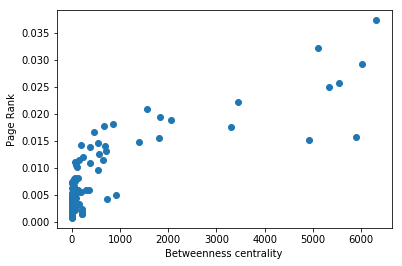

In [10]:
axes = plt.gca()
plt.plot(bt,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('Betweenness centrality')
plt.savefig("prVSbc.pdf")
plt.show()


# Intrication

We compute the Burt's matrix which is:

$\begin{pmatrix}
P(1) & P(1|2) & P(1|3) & \dots & P(1|n)\\
P(2|1) & P(2) & P(2|3) & \dots & P(2|n)\\
\vdots & \vdots & \ddots\\
\dots & \dots & \dots & \dots & P(n)
\end{pmatrix}$

$P(i)$ is the probability, taking a flight, that it exists in the compagny $C_i$.

$P(i|j)$ is the probability, taking a flight in $c_j$, that $c_i$ has the same flight.

In [11]:
matintric=multi.computeIntricationMatrixBurt()

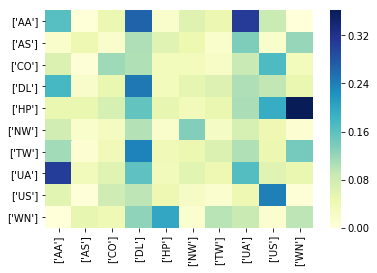

In [12]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matintric),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("intricplanes.pdf")
plt.show()


We compute its maximal left eigenvalue and the eigenvector associated. If the matrix isn't reductible (if we have all the nodes in the same connex component), this eigenvalue is unique and the eigenvector has all its coefficients of the same sign.

In [13]:
valp,vectp=valeurPropreMax(np.transpose(matintric),1000)

v,vect=np.linalg.eig(np.transpose(matintric))
print(sorted(v))
print(valp)

[-0.21737452351421332, -0.16798861262052653, -0.013596316374014308, 0.02243480558596152, 0.04430175877211916, 0.10479782726636602, 0.117884384972942, 0.2534516772577568, 0.34132098115542275, 0.8442328788779419]
0.8442328788779414


We draw the eigenvector ordered:

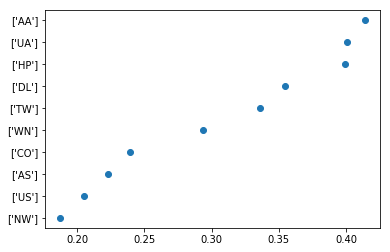

In [14]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectp[lablist.index(lab)])
vectpo,labo=l.listsSorted()

plt.plot(labo,vectpo,'o')
plt.savefig("intricscoresplanes.pdf")
plt.show()

 # Covariance

In [15]:
matcov=multi.computeCovariance()

N= 1551


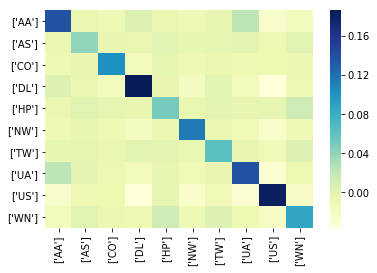

In [16]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcov),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [17]:
valpcov,vectpcov=valeurPropreMax(np.transpose(matcov),1000)
print(valpcov)

v,vect=np.linalg.eig(np.transpose(matcov))
print(sorted(v))

0.23046786394945237
[0.029816159705448722, 0.0454882374492155, 0.05019472152456323, 0.06581036156456341, 0.10446067482164736, 0.11137913937145984, 0.12357334198915806, 0.15761614307488597, 0.18667759936460254, 0.2304678639494524]


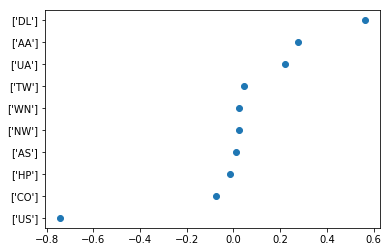

0.23046786394945237


In [18]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpcov[lablist.index(lab)])
vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("covscoresplanes.pdf")
plt.show()

print(valpcov)

## Test: covariance valeur propre minimale

In [19]:
vp,vectpro=np.linalg.eig(matcov)

taux=[matintric[i][i] for i in range(len(matcov))]

print(vp,vectpro)

for i in range(len(vectpro)):
    esp=0
    for j in range(len(vectpro[i])):
        esp=esp+vectpro[i][j]*taux[j]
    print("esp",esp, "lambda", vp[i])
    
esp_glob=0
for i in range(len(taux)):
    esp_glob=esp_glob+taux[i]
print("esperance globale=",esp_glob)
print("variance globale = ", )

[0.23046786 0.1866776  0.15761614 0.12357334 0.11137914 0.10446067
 0.02981616 0.06581036 0.05019472 0.04548824] [[ 2.77921636e-01 -2.81986019e-01  5.50361428e-01  3.99644720e-01
  -4.74042077e-01  3.13841555e-01 -1.81728951e-01  1.01705251e-01
  -1.18488153e-01 -2.93609752e-03]
 [ 9.45206555e-03 -2.84090247e-02 -5.92587020e-02 -5.61086500e-02
   3.19181022e-02  4.87571424e-02 -7.14192259e-01 -3.59306760e-02
   6.90566723e-01  2.83512260e-02]
 [-7.27284354e-02 -5.35369004e-02 -1.42177330e-01 -3.27376870e-01
  -6.39366726e-01 -5.62857275e-01 -2.62941545e-01  1.17554762e-01
  -2.36409366e-01 -3.07865357e-03]
 [ 5.62467426e-01  7.39304069e-01  1.63918106e-01  7.60299717e-03
   1.22386304e-01 -1.50814340e-01 -1.93660529e-01  1.08277136e-01
  -1.52253698e-01 -1.94289037e-04]
 [-1.61881830e-02 -5.81604849e-03 -6.87329530e-02 -1.39582363e-01
   2.69231946e-02  1.91815914e-01 -8.72783945e-02  2.14445853e-01
  -7.26577114e-02 -9.37600540e-01]
 [ 2.43419541e-02 -1.59520499e-01 -4.77571571e-01  6

## Tests precision

In [20]:
matprec=np.linalg.inv(matcov)
#for i in range(len(matprec)):
#    matprec[i][i]=0

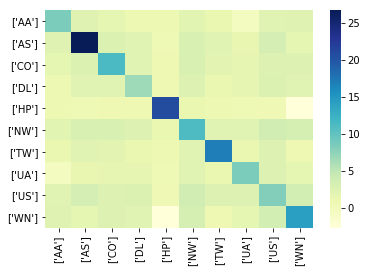

In [21]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matprec),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [22]:
valpprec,vectpprec=valeurPropreMax(np.transpose(matprec),1000)
print(1/valpprec)

v,vect=np.linalg.eig(np.transpose(matprec))
print(sorted(v))
print(1/33.53885979545708)

0.029816159705448694
[4.338999732384931, 5.356829118242999, 6.344527790690097, 8.092360244556106, 8.978341955623339, 9.572980470472412, 15.195175595851213, 19.922413545229873, 21.983705152709675, 33.53885979545708]
0.029816159705448677


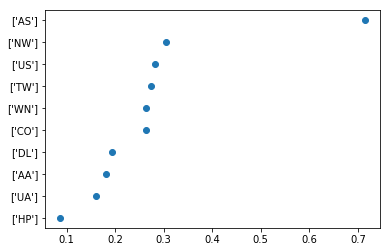

33.53885979545706


In [23]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpprec[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpprec)

## Next VP

["['AA']", "['AS']", "['CO']", "['DL']", "['HP']", "['NW']", "['TW']", "['UA']", "['US']", "['WN']"]


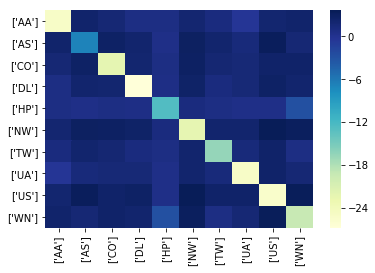

In [24]:
matprec2=matprec-valpprec*np.eye(10)

lablist=multi.giveLayersLabels()
print(lablist)
sns_plot=sns.heatmap(np.transpose(matprec2),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()


In [25]:
valpp2,vectpp2=valeurPropreMax(np.transpose(matprec2),1000)

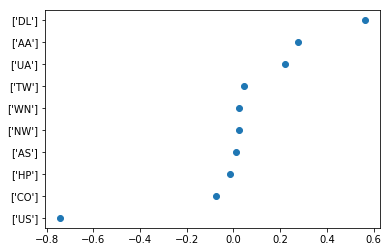

62.73871985852918


In [26]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpp2[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
#plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpp2+valpprec)

# Random walks

A step: to go on, a passenger will chose among all the possibles links he can take. Each link corresponds to a company and a destination.

For instance, from `['Montgomery Regional (Dannelly Field) Airport', '32.30059814', '-86.39399719']`
we can reach with the same probability:
```
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with Endeavor Air Inc.
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with SkyWest Airlines Inc.
['Ronald Reagan Washington National Airport', '38.8521', '-77.037697'] with PSA Airlines Inc.
['Dallas Fort Worth International Airport', '32.896801', '-97.038002'] with Envoy Air
```


In [27]:
def step(pos0,airportl,m,t,prints=False):
    if prints==True:
        print(dicoAir[pos0])
    bloque=False
    possibleDest={}
    listDest=[]
    car="none"
    for link in m.giveLinks().giveListOfLinks():
        if link.giveNodes()[0].giveNode()==pos0:
            dest=link.giveNodes()[1].giveNode()
            if not dest in listDest:
                listDest.append(dest)
                possibleDest[dest]=[]
            possibleDest[dest].append(link)
            #print(link.giveLabel())
            #print(dicoAir[(link.giveLabel()[1])],dicoCarreer[link.giveLabel()[2][0]])
    if len(listDest)==0:
        bloque=True
        pos1=pos0
        print("no neighbours")
        t1=t
    else:
        #print("----------------------------")
        li=randint(0,len(listDest)-1)
        operListe=possibleDest[listDest[li]]
        link0i=randint(0,len(operListe)-1)
        link0=operListe[link0i]
        #link0.printLink()
        #print(link0.giveLabel())
        pos1=link0.giveNodes()[1].giveNode()
        intervalsL=link0.giveIntervals()
        i=0
        car=link0.giveLabel()[2][0]
        while i<len(intervalsL) and intervalsL[i].begining()<t :
            i=i+1
        if i==len(intervalsL):
            bloque=True
            t1=t
            print("timeout")
        else:
            t1=intervalsL[i].end()
    return(pos1,t1,car,bloque)

pos0=airportl[randint(0,len(airportl)-1)]
step(pos0,airportl,m,0)

('LAX', 9648, 'UA', False)

From that, we compute the random walk: 

In [28]:
def randomWalk(airportl,m,t,collect="coverage",prints=False,boucles=1):
    pos0=airportl[randint(0,len(airportl)-1)]
    t=0
    bloque=False
    i=0
    b=0
    if collect=="coverage":
        airports=np.array([0 for i in range(len(airportl))])
        compagnies=np.array([0 for i in range(len(carL))])
    if collect=="firstTimeToReach":
        airports=np.array([tend for i in range(len(airportl))])
        compagnies=np.array([tend for i in range(len(carL))])
    while bloque==False and b<boucles:
        if prints==True:
            print(pos0,t)
        pos0,t,car,bloque=step(pos0,airportl,m,t,prints=prints)
        if bloque==True:
            b=b+1
            t=0
            bloque=False
        if collect=="coverage":
            airports[airportl.index(pos0)]=airports[airportl.index(pos0)]+1
            compagnies[carL.index(car)]=compagnies[carL.index(car)]+1
        if collect=="firstTimeToReach":
            if airports[airportl.index(pos0)]==tend:
                airports[airportl.index(pos0)]=t
            if compagnies[carL.index(car)]== tend:
                compagnies[carL.index(car)]=t
        i=i+1
    return([pos0,t,airports,compagnies])

randomWalk(airportl,m,0,prints=True,boucles=10)

SEA 0
['Seattle Tacoma International Airport', '47.449001', '-122.308998']
DTW 951
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
PHL 1090
['Philadelphia International Airport', '39.87189865112305', '-75.24109649658203']
PIT 1154
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
PHF 1366
['Newport News Williamsburg International Airport', '37.13190079', '-76.49299622']
CLT 1985
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
DTW 2127
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
EGE 9272
['Eagle County Regional Airport', '39.64260101', '-106.9179993']
DEN 9480
['Denver International Airport', '39.861698150635', '-104.672996521']
ONT 9749
['Ontario International Airport', '34.055999755859375', '-117.60099792480469']
MSP 10891
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
MCO 11426
['Orlando International A

MCI 1003
['Kansas City International Airport', '39.2976', '-94.713898']
STL 1082
['St Louis Lambert International Airport', '38.748697', '-90.370003']
OMA 1205
['Eppley Airfield', '41.3032', '-95.894096']
DSM 2102
['Des Moines International Airport', '41.534000396728516', '-93.66310119628906']
MSP 2161
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
HPN 2422
['Westchester County Airport', '41.06700134277344', '-73.70760345458984']
ORD 2622
["Chicago O'Hare International Airport", '41.9786', '-87.9048']
IAD 2811
['Washington Dulles International Airport', '38.94449997', '-77.45580292']
MIA 4086
['Miami International Airport', '25.79319953918457', '-80.29060363769531']
BDL 5320
['Bradley International Airport', '41.9388999939', '-72.68319702149999']
TPA 6397
['Tampa International Airport', '27.975500106811523', '-82.533203125']
JFK 6722
['John F Kennedy International Airport', '40.63980103', '-73.77890015']
MCO 7010
['Orlando International Airport',

TYS 12730
['McGhee Tyson Airport', '35.81100082', '-83.9940033']
PIT 13421
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
IND 13612
['Indianapolis International Airport', '39.7173', '-86.294403']
LGA 13948
['La Guardia Airport', '40.77719879', '-73.87259674']
MSP 14079
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
MDW 14222
['Chicago Midway International Airport', '41.785999', '-87.752403']
PIT 14919
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
AZO 15700
['Kalamazoo Battle Creek International Airport', '42.234901428222656', '-85.5521011352539']
LAN 18555
['Capital City Airport', '42.77870178222656', '-84.58740234375']
DTW 19220
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
TYS 19356
['McGhee Tyson Airport', '35.81100082', '-83.9940033']
PIT 19479
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
ORF 19589
['Norfolk International Airport', '3

IAH 22789
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
LAS 22886
['McCarran International Airport', '36.08010101', '-115.1520004']
MEM 23458
['Memphis International Airport', '35.04240036010742', '-89.97669982910156']
SFO 23742
['San Francisco International Airport', '37.61899948120117', '-122.375']
MCI 24099
['Kansas City International Airport', '39.2976', '-94.713898']
timeout
DFW 0
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
MOB 1340
['Mobile Regional Airport', '30.691200256348', '-88.242797851562']
CLT 1987
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
PHF 2093
['Newport News Williamsburg International Airport', '37.13190079', '-76.49299622']
PIT 2439
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
SAT 2639
['San Antonio International Airport', '29.533700942993164', '-98.46980285644531']
LAX 3494
['Los Angeles International Airport', '33.94250107', 

AUS 17226
['Austin Bergstrom International Airport', '30.194499969482422', '-97.6698989868164']
MAF 17790
['Midland International Airport', '31.9424991607666', '-102.2020034790039']
IAH 18175
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
TUL 18397
['Tulsa International Airport', '36.19839859008789', '-95.88809967041016']
ATL 19240
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
PHX 19836
['Phoenix Sky Harbor International Airport', '33.43429946899414', '-112.01200103759766']
LGB 20742
['Long Beach /Daugherty Field/ Airport', '33.81769943', '-118.1520004']
PHX 20901
['Phoenix Sky Harbor International Airport', '33.43429946899414', '-112.01200103759766']
IAH 21142
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
CLT 21407
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
BHM 22146
['Birmingham-Shuttlesworth International Airport', '3

PVD 2090
['Theodore Francis Green State Airport', '41.732601', '-71.420403']
DTW 2525
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
TPA 2732
['Tampa International Airport', '27.975500106811523', '-82.533203125']
SJU 3643
['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371']
BDL 4191
['Bradley International Airport', '41.9388999939', '-72.68319702149999']
MIA 4931
['Miami International Airport', '25.79319953918457', '-80.29060363769531']
BWI 5200
['Baltimore/Washington International Thurgood Marshall Airport', '39.1754', '-76.668297']
TPA 5424
['Tampa International Airport', '27.975500106811523', '-82.533203125']
DEN 6411
['Denver International Airport', '39.861698150635', '-104.672996521']
PIA 8015
['General Wayne A. Downing Peoria International Airport', '40.664199829100006', '-89.6932983398']
MLI 8075
['Quad City International Airport', '41.44850158691406', '-90.50749969482422']
DEN 8174
['Denver International Airpor

['ANC',
 0,
 array([ 1,  2,  0,  0,  0,  1,  0,  1,  0, 16,  1,  0,  1,  2,  5,  0,  0,
         0,  3,  3,  0,  1,  4,  1,  5,  0,  1,  0,  0,  0,  2,  1,  7,  0,
         1,  0,  0,  1,  0,  0,  5, 12,  3,  1,  1,  2,  0, 11,  0,  0,  3,
         9, 16, 14,  0,  0,  0,  1, 13,  2,  1,  0,  0,  0,  0,  8,  0,  0,
         1,  0,  0,  8,  0,  2,  0,  1,  0,  1,  1,  0,  3,  1,  2,  0,  0,
         1,  0,  3,  4,  1,  1,  1,  0,  0,  7, 15,  2,  1,  0,  9,  2,  1,
         2,  1,  3,  6,  0,  0,  0,  0,  1,  8, 10,  0,  1,  6,  1,  2,  1,
         0,  1,  1, 11, 13,  0,  3,  5,  1,  0,  0,  0, 12,  2,  0,  1,  0,
         1,  0,  0,  2,  2, 22,  5,  1,  0,  0,  2,  0,  4,  2,  0,  3, 27,
         4,  0,  4,  5,  0,  2, 10, 11,  1, 14,  1,  1,  0,  1,  6,  2,  0,
         7,  2,  4,  0,  6,  2,  2,  2,  4,  1,  0,  0,  0,  2,  9,  8,  0,
         0,  0,  2,  3, 13,  3,  3,  0,  2, 16,  1,  0,  0,  3,  6,  1,  0,
        12,  0,  5,  3,  0,  0,  2,  0,  0,  0]),
 array([ 69,   3,  49, 106

We compute then a great amount of random walks, collecting several informations:

- the coverage

In [29]:
covAirports=np.array([0 for i in range(len(airportl))])
covCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    covAirports=np.add(covAirports,airports)
    covCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


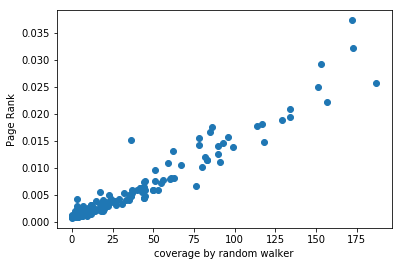

In [30]:
axes = plt.gca()
plt.plot(covAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('coverage by random walker')
plt.savefig("prVSrw.pdf")
plt.show()

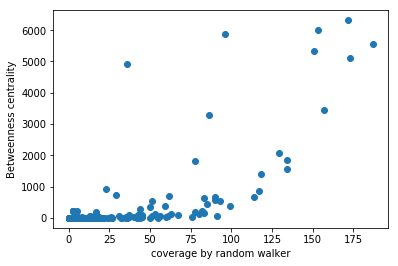

In [31]:
axes = plt.gca()
plt.plot(covAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('coverage by random walker')
plt.savefig('bcVScovrw.pdf')
plt.show()

[ 571  290  546  923  192  666  283  650 1220  473]
[0.41395559 0.22283304 0.23898782 0.35429699 0.39922538 0.18756134
 0.33580456 0.40058319 0.20535436 0.29390901]


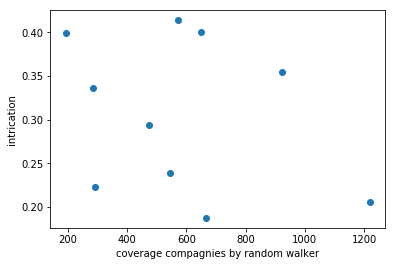

In [32]:
print(covCompagnies)
print(vectp)
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
plt.show()


- the first time to reach

In [33]:
ftrAirports=np.array([0 for i in range(len(airportl))])
ftrCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,collect="firstTimeToReach",boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    ftrAirports=np.add(covAirports,airports)
    ftrCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


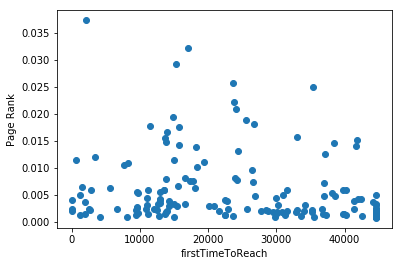

In [34]:
axes = plt.gca()
plt.plot(ftrAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('firstTimeToReach')
plt.show()

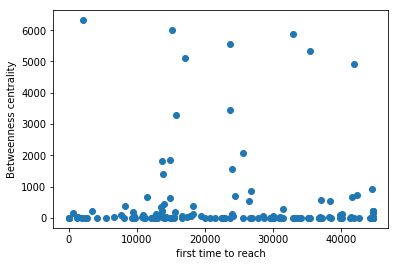

In [35]:
axes = plt.gca()
plt.plot(ftrAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('first time to reach')
plt.show()

In [36]:
nnodes=[121,102,70,68,145,101,90,120,18,134,43,95,239,108,85,103,87]
nlinks=[488,721,326,362,834,368,522,614,62,419,366,325,1358,715,1378,335,661]

['AA', 'AS', 'CO', 'DL', 'HP', 'NW', 'TW', 'UA', 'US', 'WN']


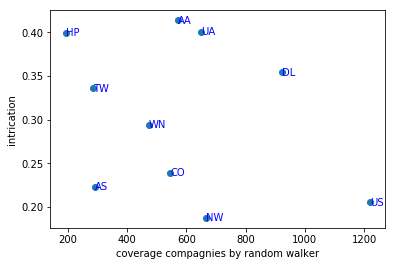

In [37]:
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(carL)
ni=0
for i in carL:
    text = axes.text(covCompagnies[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()


[4.7190082644628095, 2.843137254901961, 7.8, 13.573529411764707, 1.3241379310344827, 6.594059405940594, 3.1444444444444444, 5.416666666666667, 67.77777777777777, 3.529850746268657]


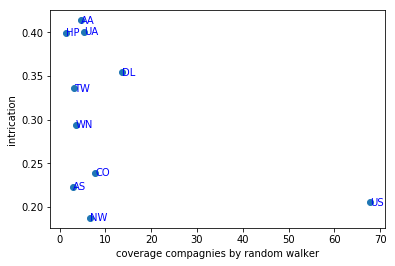

In [38]:
cov2=[covCompagnies[i]/nnodes[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(cov2)
ni=0
for i in carL:
    text = axes.text(cov2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[-1.1700819672131149, -0.40221914008321774, -1.6748466257668713, -2.5497237569060776, -0.2302158273381295, -1.809782608695652, -0.5421455938697318, -1.0586319218241043, -19.677419354838708, -1.1288782816229117]


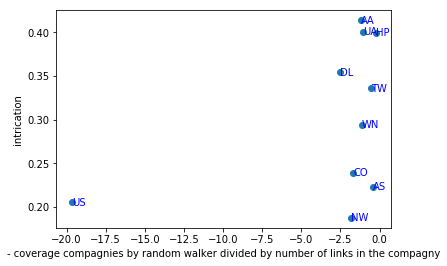

In [39]:
cov3=[-covCompagnies[i]/nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('- coverage compagnies by random walker divided by number of links in the compagny')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[-1.1700819672131149, -0.40221914008321774, -1.6748466257668713, -2.5497237569060776, -0.2302158273381295, -1.809782608695652, -0.5421455938697318, -1.0586319218241043, -19.677419354838708, -1.1288782816229117]


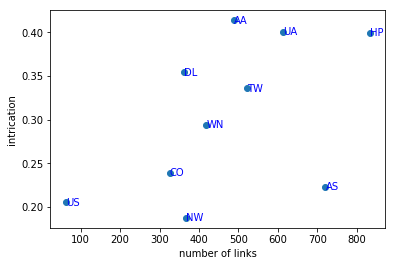

In [40]:
nlinks2=[nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nlinks2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('number of links')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nlinks2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Covariance

[ 0.27792164  0.00945207 -0.07272844  0.56246743 -0.01618818  0.02434195
  0.04625931  0.22117161 -0.74055764  0.02596511]


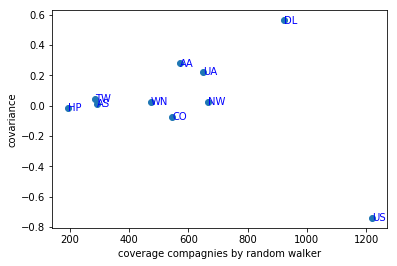

In [41]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpcov,'o')
axes.set_ylabel('covariance')
axes.set_xlabel('coverage compagnies by random walker')
print(vectpcov)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpcov[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Precision

[571, 290, 546, 923, 192, 666, 283, 650, 1220, 473]


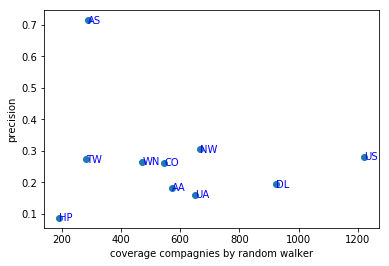

In [42]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpprec,'o')
axes.set_ylabel('precision')
axes.set_xlabel('coverage compagnies by random walker')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpprec[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

# Probas de transition

L'idée est de calculer, une fois arrivé à un aéroport $a$ à un temps $t_0$, la probabilité de prendre les vols à suivre en fonction du temps qu'il faut attendre pour cela. On considère qu'on peut prendre un lien qu'un certain temps après le temps $t2$ étudié, dans ce qu'on appellera une fenêtre. On va favoriser les vols partant le plus tôt. La probabilité de prendre un vol partant pour $b$ à $t$ sera donc: $p((t,a,b))=(t2-t)/c \times \delta_{t0<t<t2}$, avec $\sum_{\forall (t,a,b)\in E} p((t,a,b))=1$.

En calculant cela pour tous les aéroports de départ, nous obtenons une matrice d'adjacence entre les aéroports. Nous pouvons donc en tirer un vecteur propre pour la valeur propre 1, et un classement des aéroports les plus "influents", ceux dans lesquels il est le plus probable qu'un voyageur aléatoire atterrisse.


In [43]:
pt1,pt2=m.calculMatriceProbaTransition(7*60,60*24)
#m.printMS()
print(pt1)
matAirp=np.array(pt1)
matAirp=np.transpose(matAirp)
print(len(pt1))
valptrans,vectptrans=valeurPropreMax(matAirp,100000)

v,vect=np.linalg.eig(matAirp)
print(sorted(v))

['DL']
3
['DL']
3
['US']
8
['US']
8
['TW']
6
['TW']
6
['NW']
5
['NW']
5
['DL']
3
['DL']
3
['NW']
5
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['WN']
9
['DL']
3
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['WN']
9
['WN']
9
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['HP']
4
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['NW']
5
['NW']
5
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['US']
8
['US']
8
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['DL']
3
['DL']
3
['DL']
3
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['DL']
3
[

['AA']
0
['AA']
0
['AA']
0
['AA']
0
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['DL']
3
['US']
8
['UA']
7
['DL']
3
['DL']
3
['US']
8
['AA']
0
['AA']
0
['AA']
0
['NW']
5
['NW']
5
['NW']
5
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['US']
8
['US']
8
['DL']
3
['US']
8
['AS']
1
['AA']
0
['AA']
0
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['WN']
9
['DL']
3
['NW']
5
['NW']
5
['NW']
5
['DL']
3
['DL']
3
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['US']
8
[

['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['AS']
1
['AS']
1
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['US']
8
['UA']
7
['CO']
2
['CO']
2
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['UA']
7
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['CO']
2
['CO']
2
['CO']
2
['AA']
0
['AA']
0
['AA']
0
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
[

8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
7
['UA']
7
['US']
8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7

['NW']
5
['NW']
5
['NW']
5
['AA']
0
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['WN']
9
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['AA']
0
['AA']
0
['NW']
5
['NW']
5
['AA']
0
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['CO']
2
[

['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['US']
8
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['NW']
5
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['WN']
9
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
[

2
['CO']
2
['CO']
2
['HP']
4
['HP']
4
['HP']
4
['US']
8
['HP']
4
['HP']
4
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['HP']
4
['WN']
9
['WN']
9
['CO']
2
['HP']
4
['HP']
4
['NW']
5
['HP']
4
['HP']
4
['NW']
5
['NW']
5
['NW']
5
['HP']
4
['HP']
4
['WN']
9
['WN']
9
['WN']
9
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['HP']
4
['HP']
4
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AS']
1
['HP']
4
['HP']
4
['HP']
4
['US']
8
['DL']
3
['DL']
3
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4
['HP']
4

3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['US']
8
['DL']
3
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['AA']
0
['WN']
9
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['TW']
6
['TW']
6
['TW']
6
['NW']
5
['NW']
5
['NW']
5
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['CO']
2
['CO']
2
['CO']
2
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['WN']
9
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['CO']
2
['CO']
2
['CO']
2
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0

['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['DL']
3
['NW']
5
['NW']
5
['DL']
3
['DL']
3
['DL']
3
['NW']
5
['NW']
5
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['US']
8
['US']
8
['US']
8
['NW']
5
['NW']
5
['DL']
3
['DL']
3
['DL']
3
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['NW']
5
[

['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['NW']
5
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
[

['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['HP']
4
['HP']
4
['HP']
4
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['US']
8
['US']
8
['NW']
5
[

['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AS']
1
['AS']
1
['UA']
7
['UA']
7
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['US']
8
['US']
8
['US']
8
['US']
8
['CO']
2
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['NW']
5
['NW']
5
['NW']
5
['NW']
5
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['UA']
7
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['NW']
5
['NW']
5
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['US']
8
['US']
8
['AA']
0
['AA']
0
['AA']
0
[

['HP']
4
['HP']
4
['HP']
4
['UA']
7
['UA']
7
['UA']
7
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['US']
8
['US']
8
['US']
8
['AS']
1
['AS']
1
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['UA']
7
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['AS']
1
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['UA']
7
['UA']
7
['TW']
6
['TW']
6
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['TW']
6
['TW']
6
['TW']
6
['AS']
1
['AS']
1
['AS']
1
['AA']
0
['AA']
0
['AA']
0
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['UA']
7
['UA']
7
['UA']
7
[

6
['UA']
7
['UA']
7
['UA']
7
['UA']
7
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['US']
8
['US']
8
['HP']
4
['HP']
4
['HP']
4
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['US']
8
['US']
8
['US']
8
['US']
8
['US']
8
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['WN']
9
['WN']
9
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['DL']
3
['DL']
3
['DL']
3
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['WN']
9
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['TW']
6
['WN']
9
['WN']
9
['DL']
3
['DL']
3
['DL']
3
['CO']
2
['AA']
0
['AA']
0

[(-0.7314087264828535+0j), (-0.5647374092213996+0j), (-0.5416897956396698+0j), (-0.5021744375354007+0j), (-0.4557604659592122+0j), (-0.4494230524494674+0j), (-0.42821194793112977+0j), (-0.4163895571267113+0j), (-0.3790483995917764+0j), (-0.3524360597596229+0j), (-0.34325094600791706+0j), (-0.3209935706115225-0.003814447293861908j), (-0.3209935706115225+0.003814447293861908j), (-0.292356598080161+0j), (-0.2814843070900407+0j), (-0.27302749820249-0.0006968393829197625j), (-0.27302749820249+0.0006968393829197625j), (-0.2593531760750231-0.0022657204991617555j), (-0.2593531760750231+0.0022657204991617555j), (-0.2529584482983574+0j), (-0.2423709923826603-0.0030722635378265016j), (-0.2423709923826603+0.0030722635378265016j), (-0.22752899806086818+0j), (-0.2213616170363703+0j), (-0.21005521015840226+0j), (-0.20182719735223295+0j), (-0.19570919122913688+0j), (-0.19300712824522231+0j), (-0.18637064628304073+0j), (-0.18193774788182504+0j), (-0.1683903967260851+0j), (-0.1634569871184428-0.00394000

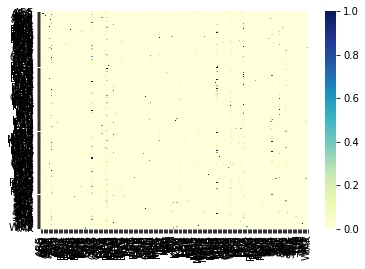

In [44]:
sns_plot=sns.heatmap(np.transpose(matAirp),cmap="YlGnBu",xticklabels=airportl,yticklabels=airportl)
plt.show()

Comparaison avec le Random walk. Ca marche quand le temps est très grand (1 jour)

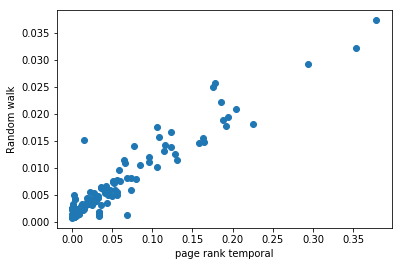

In [45]:
axes = plt.gca()
plt.plot(vectptrans,pr,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
plt.show()

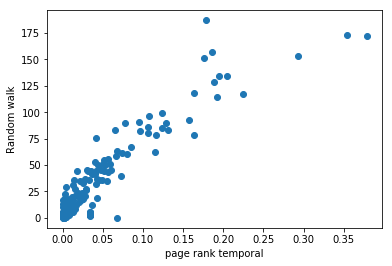

In [46]:
axes = plt.gca()
plt.plot(vectptrans,covAirports,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
plt.show()

A partir de ça, on va calculer une autre matrice de covariance. On a plein d'échantillons dans pt2. et on peut encore en faire plus sur le temps si on veut.


3.7937049164767003
2.939316954396838
2.102694964907843
7.402798740452777
0.6557855386115872
5.092465780055493
1.1706626175378805
4.625780984310724
7.540567198650458
2.7734212088622927
2.939316954396838
2.363456553189243
1.6415305084498046
5.785448759863281
0.5138869314815815
3.9815578900970374
0.9144859727200934
3.616055245816511
5.89472503579978
2.1670200415256504
2.102694964907843
1.6415305084498046
1.1919451060053234
4.13428572742914
0.366383270998199
2.8439955321311086
0.6540583654581703
2.582301716906586
4.216066115162866
1.5497546093618693
7.402798740452777
5.785448759863281
4.13428572742914
14.653075322240293
1.2897297924377602
10.02242384219286
2.3030334763177214
9.096987983551744
14.849216158033514
5.450067760912875
0.6557855386115872
0.5138869314815815
0.366383270998199
1.2897297924377602
0.11773214273830623
0.8875019729406948
0.20427201954193466
0.8069910072948455
1.3138672953558683
0.4854768295794406
5.092465780055493
3.9815578900970374
2.8439955321311086
10.02242384219286


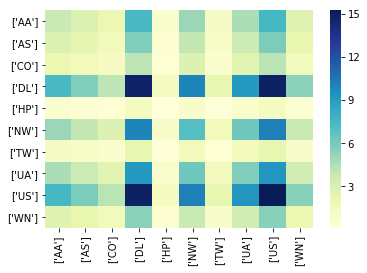

[0.31703645 0.31459105 0.31617463 0.31727728 0.31460129 0.3165479
 0.3157657  0.31697422 0.31708615 0.31620924]
[0.31703645 0.31459105 0.31617463 0.31727728 0.31460129 0.3165479
 0.3157657  0.31697422 0.31708615 0.31620924]


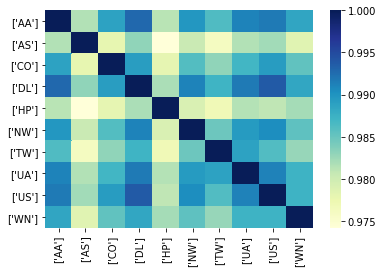

In [66]:
from math import *

matcovtemp=[[0 for j in carL] for i in carL]
avg=[0. for i in carL]

for i in range(len(carL)):
    moy=0
    for k in range(len(airportl)):
        moy+=pt2[k][i]
    avg[i]=moy/(len(carL))

for i in range(len(carL)):
    for j in range(len(carL)):
        moyprod=0
        moyi=0
        moyj=0
        for k in range(len(airportl)):
            moyprod+=(pt2[k][i]-avg[i])*(pt2[k][j]-avg[j])
        print(moyprod/(len(airportl)))
        matcovtemp[i][j]=(moyprod)/(len(pt2))

lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
plt.show()

for i in range(len(carL)):
    for j in range(len(carL)):
        if i!=j:
            matcovtemp[i][j]=matcovtemp[i][j]/(sqrt(matcovtemp[i][i])*sqrt(matcovtemp[j][j]))
for i in range(len(carL)):
    matcovtemp[i][i]=1

sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)

vecptransC=[0 for i in carL]
for i in range(len(vecptransC)):
    for j in range(len(vecptransC)):
        vecptransC[i]+=matcovtemp[i][j]

vecptransC=valeurPropreMax(matcovtemp,1000)[1]
print(vecptransC)
        
print(vecptransC)

[571, 290, 546, 923, 192, 666, 283, 650, 1220, 473]


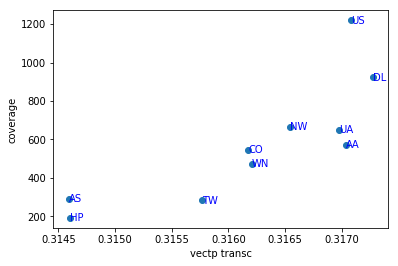

In [67]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(vecptransC,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('vectp transc')
print(cov3)
ni=0
for i in carL:
    text = axes.text(vecptransC[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()


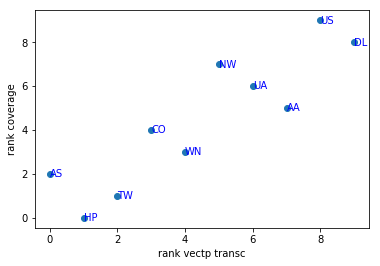

In [65]:
vecptransordo=sorted(vecptransC)
cov3ordo=sorted(cov3)
ordrevecptrans=[vecptransordo.index(vecptransC[i]) for i in range(len(vecptransC))]
ordrecov3=[cov3ordo.index(cov3[i]) for i in range(len(cov3))]
plt.plot(ordrevecptrans,ordrecov3,'o')
axes=plt.gca()
axes.set_ylabel('rank coverage')
axes.set_xlabel('rank vectp transc')
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[[0.89090909]] [0.49090909]


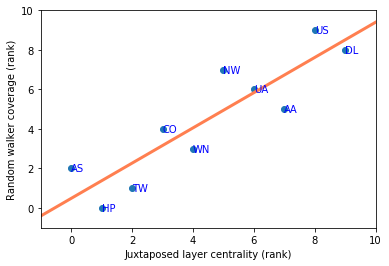

0.4125309905713972


In [74]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: training data

X = ordrevecptrans
Y = ordrecov3

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: define and train a model

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)

#----------------------------------------------------------------------------------------#
# Step 3: prediction

x_new_min = -1.0
x_new_max = 17.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)


plt.xlim(-1,10)
plt.ylim(-1,10)

#plt.title("Simple Linear Regression using scikit-learn and python 3",fontsize=10)
plt.xlabel('Juxtaposed layer centrality (rank)')
plt.ylabel('Random walker coverage (rank)')

axes=plt.gca()
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1

plt.savefig("simple_linear_regression1995.pdf", bbox_inches='tight')
plt.show()

#step 4 score 

s=0
for i in range(len(X)):
    s=s+(Y[i]-X[i]*model.coef_-model.intercept_)**2

print(sqrt(s)/(len(X)))

# Nombre de vols par compagnies

NameError: name 'nbvols' is not defined

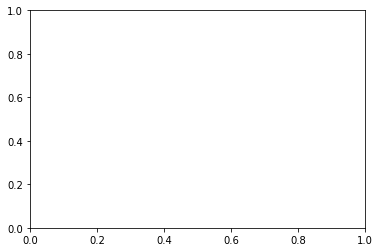

In [49]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nbvols,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('nbvols')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nbvols[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

In [ ]:
nbvols=[0 for i in carL]

for link in m.giveLinks().giveListOfLinks():
    nbVols=(len(link.giveIntervals()))
    carIndex=carL.index(link.giveLabel()[2][0])
    nbvols[carIndex]=nbvols[carIndex]+nbVols

print(nbvols)
print(carL)
tot=0
for i in range(len(nbvols)):
    tot=tot+nbvols[i]
print(tot)
plt.plot(carL,nbvols,'o')
plt.show()